<img src='./img/intel-logo.png' width=50%>

# 인텔코리아 객체인식 강의자료 1강
<font size=5><b>(Tensorflow Object Detection Tutorial)<b></font>

<div align='right'> 이 인 구 (Ike Lee) </div>
<div align='right'> 성 민 석 (Minsuk Sung) </div>
<div align='right'> 류 회 성 (Hoesung Ryu) </div>

<h1>Lecture Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Object-Dectection" data-toc-modified-id="Object-Dectection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Object Dectection</a></span></li><li><span><a href="#Tensorflow-Object-Detection-API" data-toc-modified-id="Tensorflow-Object-Detection-API-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tensorflow Object Detection API</a></span><ul class="toc-item"><li><span><a href="#Examples" data-toc-modified-id="Examples-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Examples</a></span></li></ul></li><li><span><a href="#Tutorial-Enviroments" data-toc-modified-id="Tutorial-Enviroments-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tutorial Enviroments</a></span></li><li><span><a href="#Tensorflow-API" data-toc-modified-id="Tensorflow-API-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tensorflow API</a></span></li><li><span><a href="#Google-Protocol-Buffer" data-toc-modified-id="Google-Protocol-Buffer-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Google Protocol Buffer</a></span><ul class="toc-item"><li><span><a href="#Download-protocol-buffer" data-toc-modified-id="Download-protocol-buffer-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Download protocol buffer</a></span></li><li><span><a href="#Compile-protocol-buffer" data-toc-modified-id="Compile-protocol-buffer-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Compile protocol buffer</a></span></li></ul></li><li><span><a href="#PYTHONPATH-Enviroment-Variables" data-toc-modified-id="PYTHONPATH-Enviroment-Variables-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>PYTHONPATH Enviroment Variables</a></span></li><li><span><a href="#Common-Objects-in-Context-Dataset" data-toc-modified-id="Common-Objects-in-Context-Dataset-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Common Objects in Context Dataset</a></span></li><li><span><a href="#Pretrained-model" data-toc-modified-id="Pretrained-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Pretrained model</a></span></li><li><span><a href="#Inference" data-toc-modified-id="Inference-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Inference</a></span></li><li><span><a href="#References" data-toc-modified-id="References-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>References</a></span><ul class="toc-item"><li><span><a href="#Google-Tensorflow-GitHub" data-toc-modified-id="Google-Tensorflow-GitHub-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Google Tensorflow GitHub</a></span></li><li><span><a href="#Blog-Post" data-toc-modified-id="Blog-Post-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Blog Post</a></span></li></ul></li></ul></div>

---
## Object Dectection

Object Detection은 컴퓨터비전(Computer vision), 영상처리(image processing)와 관계가 깊은 컴퓨터 기술입니다. Computer Vision 대회에서 주로 다루는 Task들의 카테고리를 확인해보면 크게 다음과 같이 3가지로 구분될 수 있습니다.

1. Classification
2. Single Classification & Localization & Detection
3. Multiple Object Detection & Localization & Classification

![](https://hoya012.github.io/assets/img/object_detection_first/fig1_cv_task.PNG)

<br>
<center><font size=4> <b>Object Detection</b> = Multi-labeled Classification + Bounding Box Regression </font></center>
<br>

Object Detection은 Image Classification task에 사물의 위치를 Bounding Box로 예측하는 Regression task가 추가된 문제라고 생각하시면 됩니다. 일반적으로 Object Detection 이라 부르는 문제는 한 이미지에 여러 class의 객체가 동시에 존재할 수 있는 상황을 가정합니다. 즉, Multi-labeled Classification (한 이미지에 여러 class 존재)과 Bounding box regression (box의 좌표 값을 예측) 두 문제가 합쳐져 있다고 생각하시면 됩니다. 그림 3의 예시는 하나의 이미지에 하나의 object가 존재하는 경우를 보여주지만 그림 1과 같이 하나의 이미지에 여러 객체가 존재하여도 검출이 가능하여야 합니다.

---

## Tensorflow Object Detection API

<img src="https://github.com/tensorflow/models/raw/master/research/object_detection/g3doc/img/kites_detections_output.jpg" width=50%>

 TensorFlow는 다양한 수준의 추상화를 제공하므로 사용자는 자신의 요구에 맞는 수준을 선택할 수 있습니다. 상위 수준의 Keras API를 사용하여 모델을 빌드하고 학습시키세요. 그러면 TensorFlow 및 머신러닝을 쉽게 시작할 수 있습니다. 유연성이 더 필요한 경우 즉시 실행 기능을 사용하면 즉각적인 반복 및 직관적인 디버깅이 가능합니다. 특히 Tensorflow Object Detection API는 이미지를 인식할 수 있도록 개발된 API로, 라이브러리 형태로 제공됩니다. Machine Learning이나 Deep learning에 대한 개념이 거의 없는 초보자라도 손쉽게 사용할 수 있으며 여러가지 상황에 맞게 사용할 수 있습니다.

### Examples
<img src='https://hoya012.github.io/assets/img/object_detection_third/fig1.PNG'>
<center>[그림 1] 도로 위 자동차와 사람 등 여러가지 객체 인식</center>
<br>

<img src='https://hoya012.github.io/assets/img/object_detection_third/fig7.PNG'>
<center>[그림 2] 축구 경기 중 선수 움직임 파악</center>
<br>

---

## Tutorial Enviroments

![](https://thedatafrog.com/static/blog/images/2019/01/tensor_flow_linux.b5d6e94350e5.png)

본 튜토리얼에 들어가기 앞서, 모든 환경은 리눅스(Linux)에서 진행하였습니다. 또한 필수 라이브러리 버전는 다음과 같이 맞춰주시길 바랍니다.

- Tensorflow : 1.14
- Networkx : 2.3

In [1]:
import os
import sys
import glob
import platform
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import tensorflow as tf
from utils.func import *

/home/intel/intel-object-detection/object_detection/utils/visualization_utils.py:29: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  import matplotlib; matplotlib.use('Agg')  # pylint: disable=multiple-statements


In [6]:
print('OS System : {}'.format(platform.system())) # Recommended OS for tutorial : Linux
print('Tensorflow Version : {}'.format(tf.__version__))
assert tf.__version__ == '1.14.0'

OS System : Linux
Tensorflow Version : 1.14.0


---

## Tensorflow API

![](https://www.tensorflow.org/site-assets/images/marketing/resources/models-hero.svg?hl=ko)

 Tensorflow Object Detection API는 여러가지 종류의 학습이 완료된(Pre-trained) 모델을 가지고 원하는 모델을 통해서 `추론`할 수 있습니다. 또한 원하는 데이터셋으로 다시 `학습`할 수 있습니다. 제공하는 GitHub Repository에서 아래 명령어를 통해서 다운로드 받습니다. 만약 이미 설치한 경우 생략해도 됩니다.

```shell
mkdir ~/GitHub && cd GitHub
git clone https://github.com/tensorflow/models.git
```

그리고 다음 아래 명령어를 통해 다음 경로로 이동합니다.
```shell
cd models/research
```

---

## Google Protocol Buffer

![](https://bloggrijjy.files.wordpress.com/2017/04/protocolbuffers.png)

### Download protocol buffer

 Google에서 제공하는 Object Detection API를 이용하기 위해서 **`프로토콜 버퍼(protocol buffer)`를 이용**해야합니다. 프로토콜 버퍼는  2001 년 구글이 개발한 이식성과 확장성이 좋고 효율적인 이진 포맷으로 2008 년에 오픈 소스로 공개되었습니다. 이는 csv,xml,json과 같은 `이진 직렬화 데이터 구조`라고 정의할 수 있습니다. 텐서플로우는 파일 저장 포맷을 프로토콜 버퍼(protobuf=pb)로 하고, 이는 xml, json 를 직렬화한 구조이기 때문에 더 빠르고 간단합니다.

본 튜토리얼에서 사용하는 프로토콜 버퍼를 아래 명령어를 통하여 다운로드 후 압축을 풀어주도록 합니다.
```shell
wget https://github.com/google/protobuf/releases/download/v3.3.0/protoc-3.3.0-linux-x86_64.zip
unzip protoc-3.3.0-linux-x86_64.zip -d protoc-3.3.0
```

### Compile protocol buffer

프로토콜 버퍼는 여러 프로그래밍 언어를 지원하기 때문에, 특정 언어에 종속성이 없는 형태로 데이터 타입을 정의하고, 이 파일을 proto file 이라고 합니다. 각 프로그래밍 언어에서 사용하기 위해 protoc 컴파일러를 이용하여 proto file을 컴파일하면, 각 언어에 맞는 형태의 데이터 클래스 파일을 생성해줍니다.

위의 과정을 위해, Object Detection API를 설치한 디렉토리에서 models 디렉토리로 들어간 후에, 다음 명령어를 수행합니다. 아래 명령어를 통해서 해당 경로에 있는 proto 파일들을 컴파일 해줄 수 있습니다.

```shell
protoc-3.3.0/bin/protoc ~/GitHub/models/research/object_detection/protos/*.proto --python_out=.
```

---

## PYTHONPATH Enviroment Variables

<img src='https://i.pinimg.com/originals/3c/c0/1d/3cc01d9602419d6afa118c66eb28a1b5.png' width=50%>
<br>

 기본적으로 설치된 Python3 런타임을 PATH 환경변수에 추가해서 사용하면 됩니다. 그러나 서비스 환경에서는 외부 라이브러리 의존성 관리라든가 동일한 호스트에서 다른 버전의 런타임의 필요성 등이 민감한 문제가 될 수 있습니다. 따라서 Google Tensorflow API를 사용하기 위해선 아래와 같이 PYTHONPATH 환경변수를 설정합니다.

In [8]:
!export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim:`pwd`/object_detection && \
python3 object_detection/builders/model_builder_test.py

/home/intel/intel-object-detection/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/intel/intel-object-detection/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/intel/intel-object-detection/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/intel/intel-object-detect

---
## Common Objects in Context Dataset

<img src='https://miro.medium.com/max/800/1*B2QCIbBHNnVYwqIwaLS7zA.png' width=80%>
<center>COCO Dataset Examples</center>
<br>

 지금까지 머신러닝을 위해 다양한 데이터셋이 만들어져 있습니다. 그 중에 가장 많이 사랑받고 있는 Common Objects in Context (이하 COCO) Dataset은 Object Detection, Image Segmentation 등을 위해 사용되고 있습니다. 매년 다른 Dataset으로 전 세계의 여러 대학/기업이 참가하는 대회에 활용되고 있습니다. Google이 공개한 TensorFlow Object Detection API에서도 COCO dataset으로 학습시킨 모델이 들어있습니다. COCO dataset에는 과연 어떤 데이터가 있는지 확인해봅시다. 아래를 통해서 COCO dataset의 label 정보를 확인할 수 있습니다. 대략 80개 정도의 label이 존재함을 알 수 있습니다.

In [9]:
class_info = get_coco_class_label()
for idx,c in enumerate(class_info.values(),start=1):
    print('[{:>3}] {:>15} \t'.format(str(idx).zfill(3),c[0]),end=' ')
    if idx % 4 == 0:
        print('')

[001]          person 	 [002]         bicycle 	 [003]             car 	 [004]      motorcycle 	 
[005]        airplane 	 [006]             bus 	 [007]           train 	 [008]           truck 	 
[009]            boat 	 [010]   traffic light 	 [011]    fire hydrant 	 [012]       stop sign 	 
[013]   parking meter 	 [014]           bench 	 [015]            bird 	 [016]             cat 	 
[017]             dog 	 [018]           horse 	 [019]           sheep 	 [020]             cow 	 
[021]        elephant 	 [022]            bear 	 [023]           zebra 	 [024]         giraffe 	 
[025]        backpack 	 [026]        umbrella 	 [027]         handbag 	 [028]             tie 	 
[029]        suitcase 	 [030]         frisbee 	 [031]            skis 	 [032]       snowboard 	 
[033]     sports ball 	 [034]            kite 	 [035]    baseball bat 	 [036]  baseball glove 	 
[037]      skateboard 	 [038]       surfboard 	 [039]   tennis racket 	 [040]          bottle 	 
[041]      wine glass 	 [042] 

---
## Pretrained model

![](https://hoya012.github.io/assets/img/object_detection_first/fig5_detection_milestones.PNG)

 위 그림은 대표적인 Object Detection 방법론들이 시간 순서로 나열되어 있습니다. Deep learning이 나오기 이전에는 대표적으로 SIFT, Haar Cascades, BoW, HOG, SURF, DPM 등 여러가지 방법을 통해서 Object Detection을 시도했습니다. 하지만 Deep learning을 이용한 방법론은 이러한 방법들을 앞지를만큼 성능이 우수했습니다. 이러한 여러 Deep learning 모델 중 Object Detection 분야에서 가장 많이 활용되고 있는 모델은 Faster R-CNN, MobileSSD 그리고 YOLO와 같은 모델이 있습니다.

<img src="./img/tensorflow_github.png" width=70%>

Tensorflow에서 제공하는 Object Detection Model은 모두 [Google GitHub](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md)을 통해서 이용할 수 있습니다. 그 중에서도 COCO Dataset을 사전 학습한 모델인 `Faster R-CNN` 모델을 아래 코드롤 통하여 가져옵니다.

In [10]:
model_name = 'ssd_mobilenet_v1_coco_2018_01_28'

In [11]:
%%time
get_pretrained_model(model_name)

/home/intel/intel-object-detection/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: URLopener style of invoking requests is deprecated. Use newer urlopen functions/methods
  """Entry point for launching an IPython kernel.


[SUCCESS] Download Complete...
CPU times: user 286 ms, sys: 244 ms, total: 530 ms
Wall time: 10.2 s


`pretrained_model` 폴더로 이동하여 다운로드 받은 파일을 확인합니다.

In [12]:
!cd pretrained_model && ls

coco_class.txt			      ssd_mobilenet_v1_coco_2018_01_28
faster_rcnn_resnet50_coco_2018_01_28  ssd_mobilenet_v1_coco_2018_01_28.tar.gz


In [13]:
!file ./pretrained_model/ssd_mobilenet_v1_coco_2018_01_28.tar.gz

./pretrained_model/ssd_mobilenet_v1_coco_2018_01_28.tar.gz: gzip compressed data, last modified: Thu Feb  8 02:03:03 2018, from Unix


위에서 다운로드 받은 파일을 압축 해제합니다.

In [14]:
!cd ./pretrained_model && tar -xvf ssd_mobilenet_v1_coco_2018_01_28.tar.gz

ssd_mobilenet_v1_coco_2018_01_28/
ssd_mobilenet_v1_coco_2018_01_28/model.ckpt.index
ssd_mobilenet_v1_coco_2018_01_28/checkpoint
ssd_mobilenet_v1_coco_2018_01_28/pipeline.config
ssd_mobilenet_v1_coco_2018_01_28/model.ckpt.data-00000-of-00001
ssd_mobilenet_v1_coco_2018_01_28/model.ckpt.meta
ssd_mobilenet_v1_coco_2018_01_28/saved_model/
ssd_mobilenet_v1_coco_2018_01_28/saved_model/saved_model.pb
ssd_mobilenet_v1_coco_2018_01_28/saved_model/variables/
ssd_mobilenet_v1_coco_2018_01_28/frozen_inference_graph.pb


위에서 압축 해제된 파일들을 확인합니다.

In [15]:
!cd ./pretrained_model && \
cd ssd_mobilenet_v1_coco_2018_01_28 && ls

checkpoint			model.ckpt.index  saved_model
frozen_inference_graph.pb	model.ckpt.meta
model.ckpt.data-00000-of-00001	pipeline.config


학습이 완료된 그래프(pb)에 대하여 로딩을 준비합니다. 이 파일은 객체인식 추론을 수행하기 위하여 사용됩니다.

In [16]:
PRETRAINED_MODEL_PATH = './pretrained_model'
PATH_TO_FROZEN_GRAPH = PRETRAINED_MODEL_PATH + '/' + model_name + '/frozen_inference_graph.pb'
PATH_TO_FROZEN_GRAPH

'./pretrained_model/ssd_mobilenet_v1_coco_2018_01_28/frozen_inference_graph.pb'

사전 학습된 가중치 파일을 읽어서 그래프를 재생성합니다.

In [17]:
detection_graph = tf.Graph()
with detection_graph.as_default():
 
    od_graph_def = tf.GraphDef()
 
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as f:
 
        serialized_graph = f.read()
        od_graph_def.ParseFromString(serialized_graph)                                             
 
        tf.import_graph_def(od_graph_def, name = "")
print('Done')

Done


## Inference

<img src='https://images.squarespace-cdn.com/content/v1/5be5dbe9b105986ea61acd62/1542602895369-5B0CVDINY7AQ3E82YJSO/ke17ZwdGBToddI8pDm48kOggE0Ch6pMGalwtLMqzsSB7gQa3H78H3Y0txjaiv_0fDoOvxcdMmMKkDsyUqMSsMWxHk725yiiHCCLfrh8O1z5QPOohDIaIeljMHgDF5CVlOqpeNLcJ80NK65_fV7S1Uft-jeL99Oy5JFlEHZ1VPcs2fZ-Ylxl26kAcJ6zlp6kQpC969RuPXvt2ZwyzUXQf7Q/artificial-intelligence-3685928_1920.png?format=1500w' width=70%>

 위에서 가져온 사전 학습된 모델을 테스트해보기 위해서 일단 COCO dataset의 label 정보를 가져옵니다. 그리고 Tensorflow API를 통해서 사전 학습된 모델을 통해서 추론한 결과는 아래와 같이 확인할 수 있습니다.

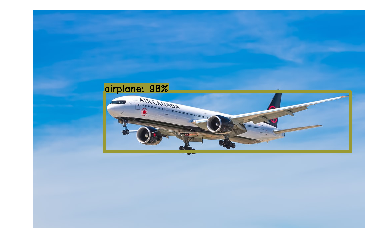

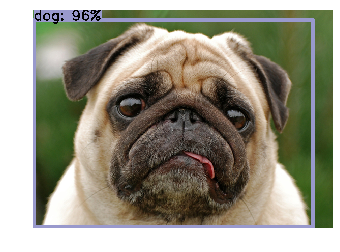

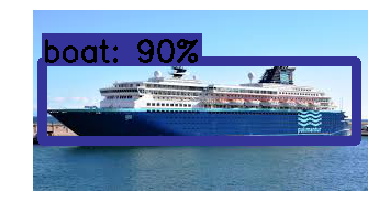

In [18]:
%matplotlib inline
PATH_TO_TEST_IMAGE = './img/test_coco/'

for n,img_path in tqdm(enumerate(sorted(glob.glob(PATH_TO_TEST_IMAGE+'*.jpg')),start=1)):
    img = plt.imread(img_path)
    output_dict = run_inference_for_single_image(img, detection_graph)
    result = draw_bounding_boxes(img, output_dict, class_info)
    plt.axis('off')
    plt.imshow(result.astype(np.int) / 255)
    plt.show()

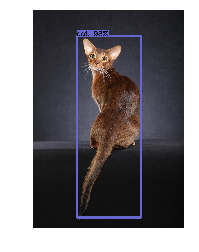

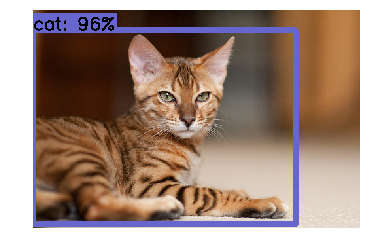

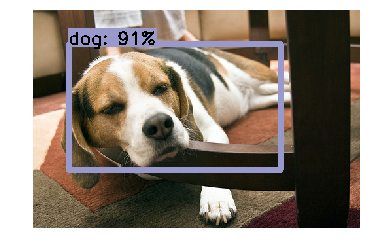

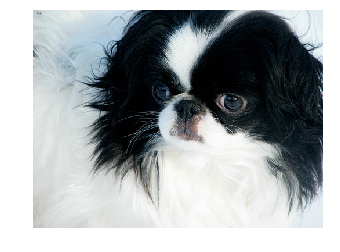

In [19]:
%matplotlib inline
PATH_TO_TEST_IMAGE = './img/test_pet/'

for n,img_path in tqdm(enumerate(sorted(glob.glob(PATH_TO_TEST_IMAGE+'*.jpg')),start=1)):
    img = plt.imread(img_path)
    output_dict = run_inference_for_single_image(img, detection_graph)
    result = draw_bounding_boxes(img, output_dict, class_info)
    plt.axis('off')
    plt.imshow(result.astype(np.int) / 255)
    plt.show()

 결과를 통해서 별도의 학습 과정 없이도 사전 학습된 모델이 원하는 객체를 잘 인식함을 확인할 수 있습니다. 하지만 마지막 japanese_chin 의 경우 cat 으로 검출하지 못하고, 다양한 종류의 고양이들을 이름별로 분류하지 못하고, 'cat' 이라고만 분류하는 것을 볼 수 있습니다. 이렇듯 Pretrained model은 기존 레이블만 잘 인식할 뿐, 사용자가 원하는 레이블은 따로 학습을 시켜야합니다. 다음 강의에서는 사용자가 원하는 라벨을 학습할 수 있는 방법을 알아봅시다.

---

## References

### Google Tensorflow GitHub
- https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md
- https://github.com/tensorflow/models/blob/master/research/object_detection/object_detection_tutorial.ipynb
- https://github.com/protocolbuffers/protobuf/releases

### Blog Post
- https://bcho.tistory.com/1192
- https://hoya012.github.io/blog/Tutorials-of-Object-Detection-Using-Deep-Learning-what-is-object-detection/
- https://deepbaksuvision.github.io/Modu_ObjectDetection/posts/01_00_What_is_Object_Detection.html
- https://taeu.github.io/paper/deeplearning-paper-ssd/
- https://teamlab.github.io/jekyllDecent/blog/object%20detection/Object-detection-tutoral
- https://ukayzm.github.io/python-object-detection-tensorflow/
- https://towardsdatascience.com/real-time-object-detection-with-tensorflow-detection-model-e7fd20421d5d
- https://github.com/ukayzm/opencv/tree/master/object_detection_tensorflow
- http://blog.naver.com/PostView.nhn?blogId=bdh0727&logNo=221341342386&from=search&redirect=Log&widgetTypeCall=true&directAccess=false
- https://m.blog.naver.com/PostView.nhn?blogId=dschae9&logNo=221159192026&proxyReferer=https%3A%2F%2Fwww.google.com%2F
- https://github.com/Daehyun-Bae/Object_Detection_API_utils
- https://bcho.tistory.com/1192
- https://ballentain.tistory.com/15
- https://ballentain.tistory.com/14
- http://solarisailab.com/archives/2422
- https://forum.ubuntu-kr.org/viewtopic.php?t=21841
- https://you359.github.io/tensorflow%20models/Tensorflow-Object-Detection-API-Training/